## ติดตั้งโปรแกรมที่เกี่ยวข้อง

*   selenium
*   chromium-chromedriver



In [1]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver

     |████████████████████████████████| 963 kB 5.3 MB/s 
     |████████████████████████████████| 359 kB 53.5 MB/s 
     |████████████████████████████████| 138 kB 47.1 MB/s 
     |████████████████████████████████| 3.6 MB 36.4 MB/s 
     |████████████████████████████████| 55 kB 1.4 MB/s 
     |████████████████████████████████| 58 kB 4.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.8 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/

## load lib


*   selenium
*   IPython.display
*   pandas
* datetime
* time
* json

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from IPython.display import Image
import pandas as pd
from datetime import datetime,timedelta
import time
import json

## สร้าง ChromeOptions



In [2]:
chrome_options = webdriver.ChromeOptions()
driver = webdriver.Chrome(chrome_options=chrome_options)

C:\Users\win10x64\AppData\Local\Temp\ipykernel_14812\128282493.py:2: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chrome_options=chrome_options)


In [3]:
driver.get("http://www.google.com")

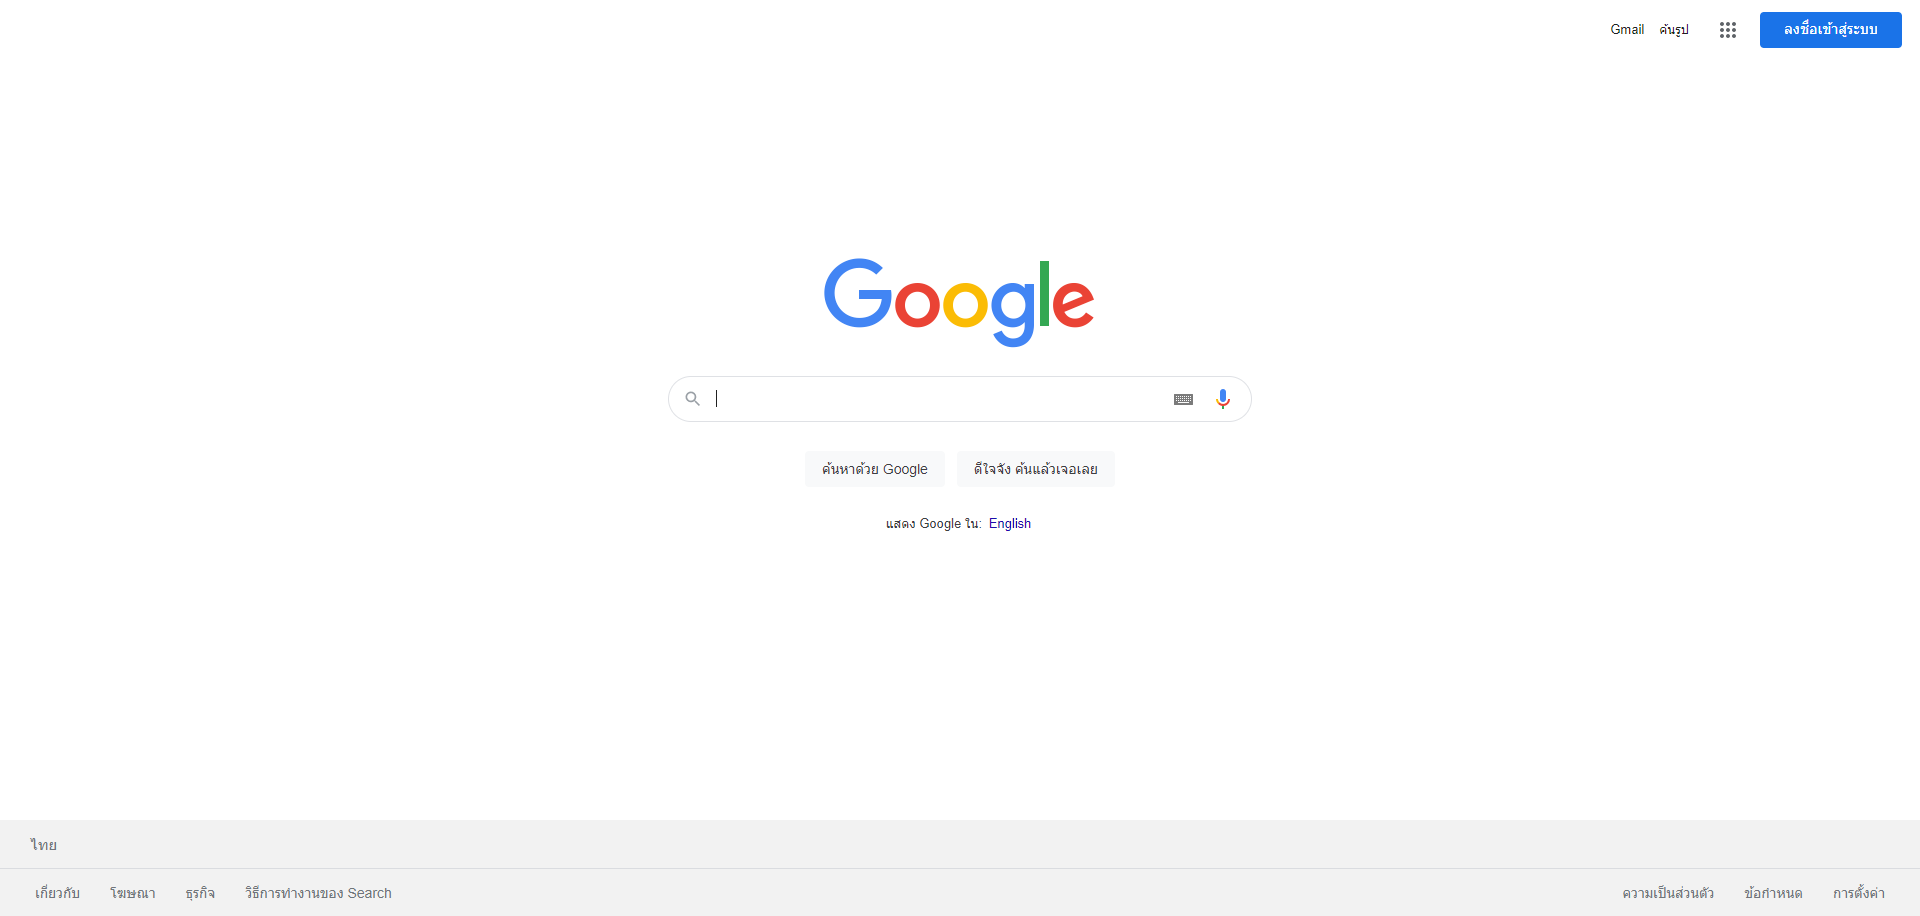

In [4]:
driver.save_screenshot("screenshot.png")
Image('screenshot.png')

## โหลดหน้า

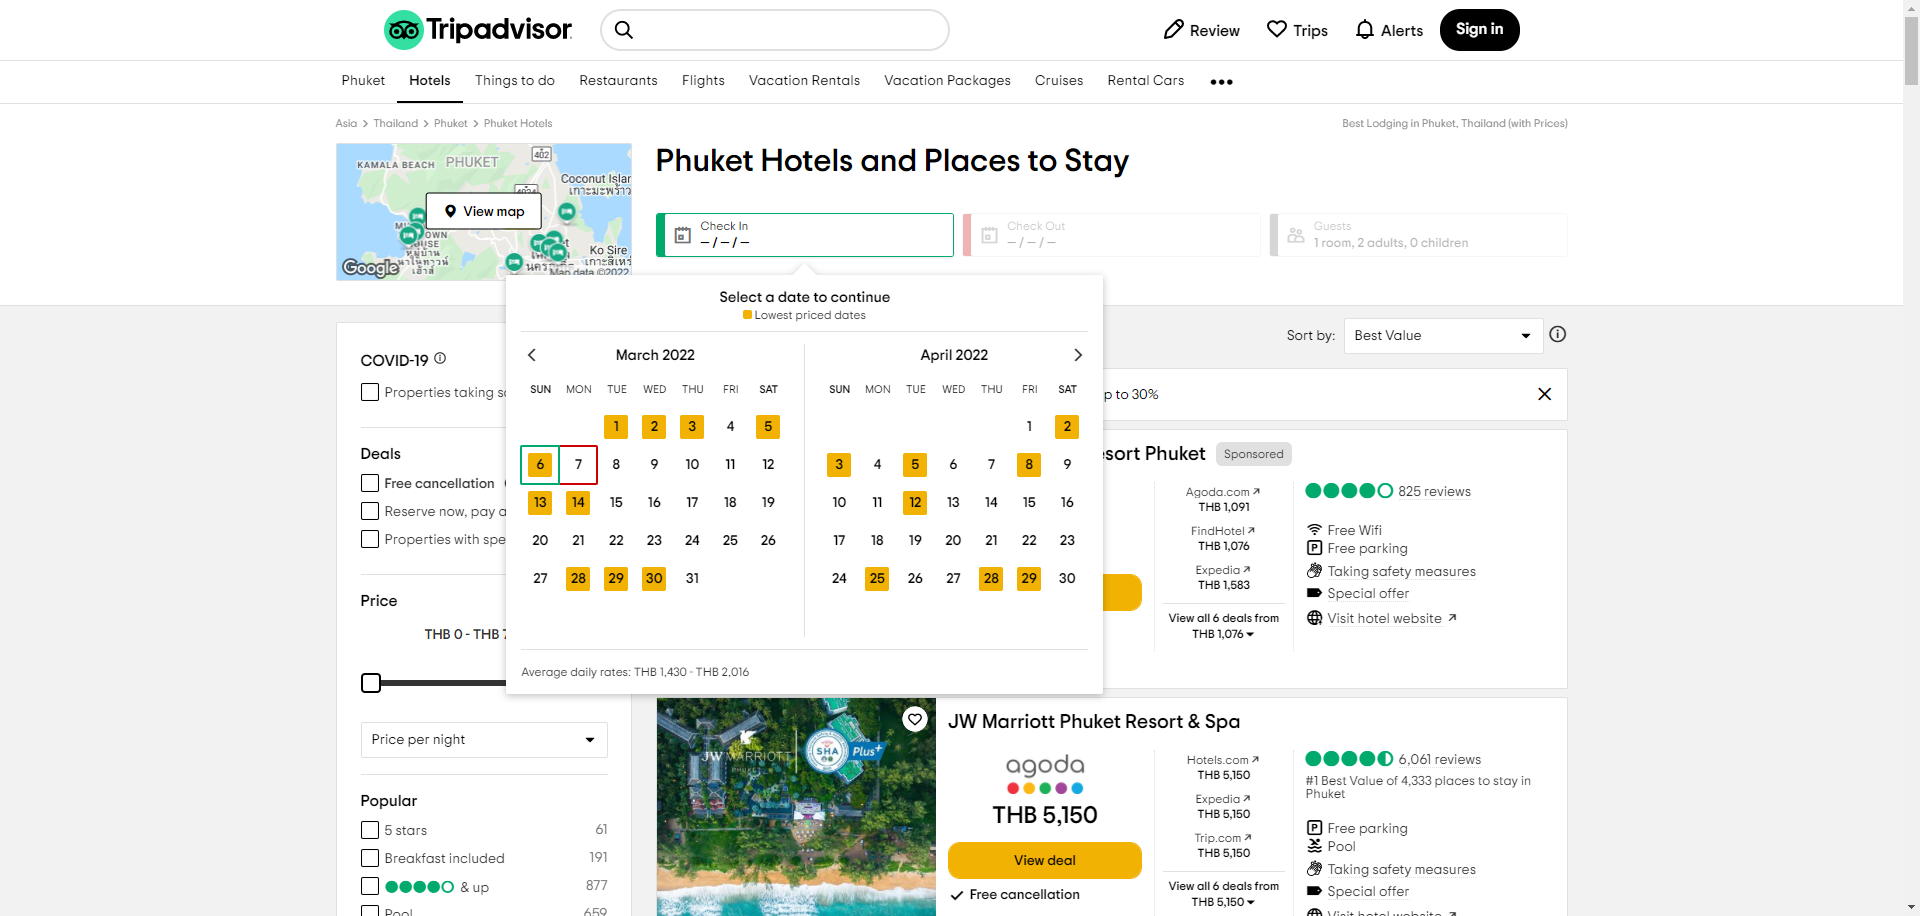

In [5]:
url = 'https://www.tripadvisor.com/Hotels-g293920-Phuket-Hotels.html'
driver.get(url)
time.sleep(10)
driver.save_screenshot("screenshot.png")
Image('screenshot.png')

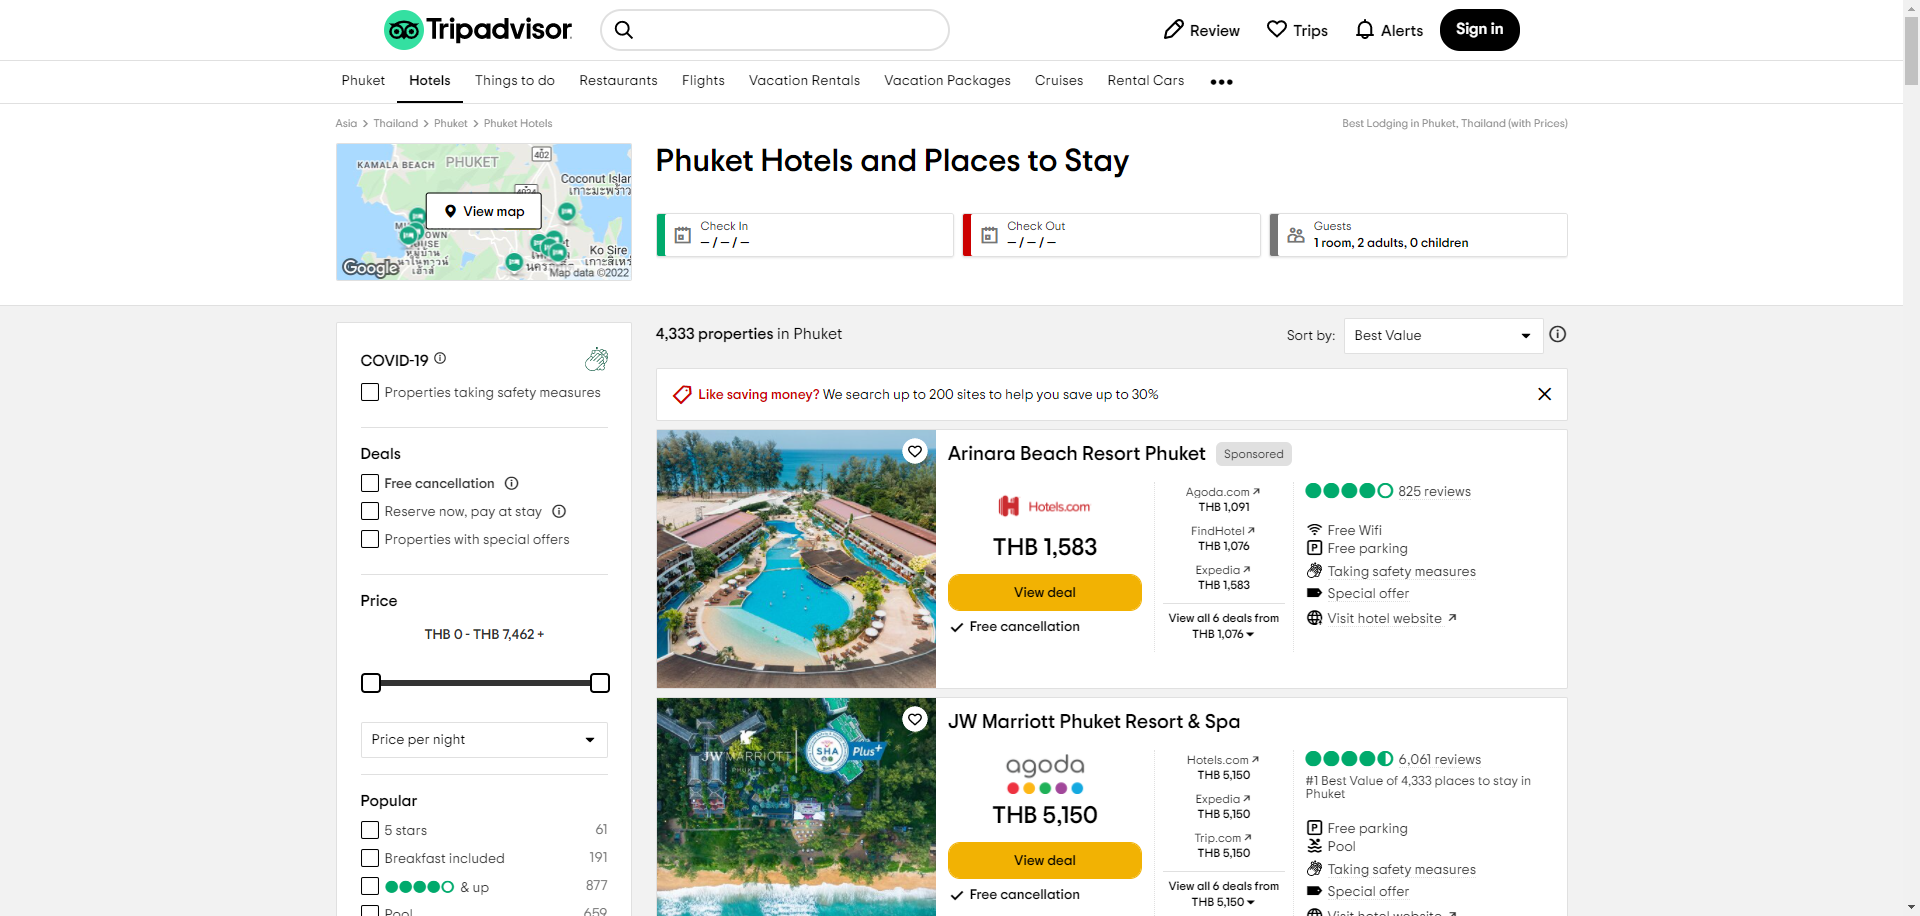

In [6]:
driver.switch_to.active_element.send_keys(Keys.ESCAPE)
driver.save_screenshot("screenshot.png")
Image('screenshot.png')

# ฟังก์ชั่นทั่วไป

## find_elements_by_id

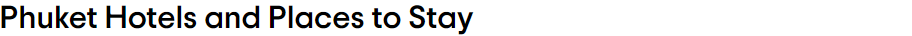

In [7]:
elements_by_id =  driver.find_element(By.ID,"HEADING")
elements_by_id.screenshot("screenshot.png")
Image('screenshot.png')

In [8]:
#.text
elements_by_id.text

'Phuket Hotels and Places to Stay'

In [9]:
#.get_attribute
elements_by_id.get_attribute('class')

'page_h1 ui_header h1 responsive corgi'

In [10]:
#.get_attribute
elements_by_id.get_attribute('data-test-target')

## find_elements_by_class

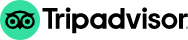

In [11]:
elements_by_class = driver.find_element(By.CLASS_NAME,'bDssy')
elements_by_class.screenshot("screenshot.png")
Image('screenshot.png')

In [12]:
#.text
elements_by_class.text

''

In [13]:
#.get_attribute
elements_by_class.get_attribute('class')

'bDssy _R _Z'

In [14]:
#.get_attribute
elements_by_class.get_attribute('data-test-target')

In [15]:
#.get_attribute
elements_by_class.get_attribute('src')

'https://static.tacdn.com/img2/brand_refresh/Tripadvisor_lockup_horizontal_secondary_registered.svg'

In [16]:
#.get_attribute
elements_by_class.get_attribute('alt')

'Tripadvisor'

## find_element_by_xpath

In [17]:
elements_by_xpath = driver.find_element(By.XPATH ,"//*[@class = 'property_title prominent ']")
elements_by_xpath.screenshot("screenshot.png")
Image('screenshot.png')

In [18]:
elements_by_xpath.text

'Arinara Beach Resort Phuket'

In [19]:
elements_by_xpath.tag_name

'a'

In [20]:
elements_by_xpath.location

{'x': 948, 'y': 444}

In [21]:
elements_by_xpath.is_displayed()

True

# ทดลองเก็บข้อมูลรายชื่อโรงแรม



In [22]:
# กรอบใหญ่ของข้อมูล
elements = driver.find_element(By.CLASS_NAME ,"bodycon_main")

In [23]:
# หากรอบข้อมูลเฉพาะรายการ
items = elements.find_elements(By.XPATH,".//*[@data-prwidget-name = 'meta_hsx_responsive_listing']")
len(items)

37

In [24]:
# แสดงข้อมูลในการรายการแรก
items[0].text

'Sponsored\nArinara Beach Resort Phuket\nTHB 1,583\nView deal\nFree cancellation\nAgoda.com\nTHB 1,091\nFindHotel\nTHB 1,076\nExpedia\nTHB 1,583\nView all 6 deals from THB 1,076\n825 reviews\nFree Wifi\nFree parking\nTaking safety measures\nSpecial offer\nVisit hotel website'

### ดูชื่อโรงแรม

In [25]:
print(items[0].find_element(By.XPATH ,"//*[@class = 'property_title prominent ']").text)
print(items[1].find_element(By.XPATH ,"//*[@class = 'property_title prominent ']").text)

Arinara Beach Resort Phuket
Arinara Beach Resort Phuket


In [26]:
print(items[1].find_element(By.XPATH ,".//*[@class = 'property_title prominent ']").text)

JW Marriott Phuket Resort & Spa


### ดึงข้อมูลอาจจะหาไม่พบทุกรายการ

In [27]:
len(driver.find_elements(By.XPATH ,"//*[@aria-label = \"Travelers' Choice 2021 Winner\"]"))

1

In [28]:
item = items[1]
hotel_info = {}
# ดูชื่อโรงแรม
temp = item.find_elements(By.XPATH ,".//*[@class = 'property_title prominent ']")
if len(temp) > 0:
  hotel_info['hotel_name'] = temp[0].text
  # ดู hotel id
  hotel_info['hotel_id'] = temp[0].get_attribute('id')
  # ดูลิงค์รายละเอียดโรงแรม
  hotel_info['hotel_href'] = temp[0].get_attribute('href')

temp = item.find_elements(By.XPATH ,".//*[@aria-label = \"Travelers' Choice 2021 Winner\"]")
if len(temp) >0 :
  hotel_info['Choice2021Winner'] = True

temp = item.find_elements(By.XPATH ,".//*[@data-clicksource = \"BubbleRating\"]")
if len(temp) >0 :
  hotel_info['review_rating'] = temp[0].get_attribute('alt')
  
temp = item.find_elements(By.XPATH ,".//a[@class = \"review_count\"]")
if len(temp) >0 :
  hotel_info['review_count'] = temp[0].text
hotel_info


{'hotel_name': 'JW Marriott Phuket Resort & Spa',
 'hotel_id': 'property_519702',
 'hotel_href': 'https://www.tripadvisor.com/Hotel_Review-g1223683-d519702-Reviews-JW_Marriott_Phuket_Resort_Spa-Mai_Khao_Thalang_District_Phuket.html',
 'review_rating': '4.5 of 5 bubbles',
 'review_count': '6,061 reviews'}

### แสดงรายชื่อโรงแรมทั้งหมดในหน้า

In [29]:
hotel_list = []
for item in items:
  # print(item.find_element(By.XPATH ,".//*[@class = 'property_title prominent ']").text)
  hotel_info = {}
# ดูชื่อโรงแรม
  temp = item.find_elements(By.XPATH ,".//*[@class = 'property_title prominent ']")
  if len(temp) > 0:
    hotel_info['hotel_name'] = temp[0].text
    # ดู hotel id
    hotel_info['hotel_id'] = temp[0].get_attribute('id')
    # ดูลิงค์รายละเอียดโรงแรม
    hotel_info['hotel_href'] = temp[0].get_attribute('href')
  temp = item.find_elements(By.XPATH ,".//*[@aria-label = \"Travelers' Choice 2021 Winner\"]")
  if len(temp) >0 :
    hotel_info['Choice2021Winner'] = True
  temp = item.find_elements(By.XPATH ,".//*[@data-clicksource = \"BubbleRating\"]")
  if len(temp) >0 :
    hotel_info['review_rating'] = temp[0].get_attribute('alt')
  temp = item.find_elements(By.XPATH ,".//a[@class = \"review_count\"]")
  if len(temp) >0 :
    hotel_info['review_count'] = temp[0].text
  hotel_list.append(hotel_info)
hotel_list

[{'hotel_name': 'Arinara Beach Resort Phuket',
  'hotel_id': 'property_3879035',
  'hotel_href': 'https://www.tripadvisor.com/Hotel_Review-g1224250-d3879035-Reviews-Arinara_Beach_Resort_Phuket-Choeng_Thale_Thalang_District_Phuket.html',
  'review_rating': '4 of 5 bubbles',
  'review_count': '825 reviews'},
 {'hotel_name': 'JW Marriott Phuket Resort & Spa',
  'hotel_id': 'property_519702',
  'hotel_href': 'https://www.tripadvisor.com/Hotel_Review-g1223683-d519702-Reviews-JW_Marriott_Phuket_Resort_Spa-Mai_Khao_Thalang_District_Phuket.html',
  'review_rating': '4.5 of 5 bubbles',
  'review_count': '6,061 reviews'},
 {'hotel_name': 'Grand Mercure Phuket Patong',
  'hotel_id': 'property_6390760',
  'hotel_href': 'https://www.tripadvisor.com/Hotel_Review-g297930-d6390760-Reviews-Grand_Mercure_Phuket_Patong-Patong_Kathu_Phuket.html',
  'review_rating': '4.5 of 5 bubbles',
  'review_count': '2,706 reviews'},
 {'hotel_name': 'Amari Phuket',
  'hotel_id': 'property_305178',
  'hotel_href': 'http

In [30]:
pd.DataFrame(hotel_list)

hotel_name           hotel_id  \
0                         Arinara Beach Resort Phuket   property_3879035   
1                     JW Marriott Phuket Resort & Spa    property_519702   
2                         Grand Mercure Phuket Patong   property_6390760   
3                                        Amari Phuket    property_305178   
4                          Hotel Clover Patong Phuket  property_13140255   
5                       Katathani Phuket Beach Resort    property_540134   
6                              The Shore At Katathani   property_1739625   
7                                   The Nature Phuket  property_15023535   
8   Avista Grande Phuket Karon - MGallery Hotel Co...  property_12629455   
9          Phuket Marriott Resort & Spa, Merlin Beach    property_315568   
10  Four Points by Sheraton Phuket Patong Beach Re...  property_19819026   
11                            The Marina Phuket Hotel  property_12725009   
12  DoubleTree by Hilton Phuket Banthai Resort (SH...    property_448627   
13                       Anantara Layan Phuket Resort    property_641478   
14                            Oceanfront Beach Resort  property_19448858   
15               Pullman Phuket Arcadia Naithon Beach   property_3217202   
16                     Baan Laimai Beach Resort & Spa    property_557954   
17                                 Banyan Tree Phuket    property_302772   
18                                           Amanpuri    property_305200   
19                         Crest Resort & Pool Villas   property_9865117   
20                         Kalima Resort & Spa Phuket   property_2542406   
21                                       The Nai Harn    property_302529   
22                               The Pavilions Phuket    property_578956   
23                  Centara Grand Beach Resort Phuket   property_1793896   
24                 Hilton Phuket Arcadia Resort & Spa    property_305270   
25                            The Charm Resort Phuket   property_6002619   
26     Phuket Marriott Resort and Spa, Nai Yang Beach    property_566487   
27                                 SAii Laguna Phuket    property_305851   
28                                 Beyond Resort Kata   property_1088298   
29                   Fishermen’s Harbour Urban Resort   property_7392733   
30                           BYD Lofts Boutique Hotel    property_642305   
31                                     Andakira Hotel   property_1557555   
32                       Patong Bay Hill Resort & Spa   property_9697511   
33                           Naithonburi Beach Resort    property_599577   
34                                 PJ Patong Resortel   property_2043861   
35                     The Royal Paradise Hotel & Spa    property_305175   
36                                         OZO Phuket  property_16798306   

                                           hotel_href     review_rating  \
0   https://www.tripadvisor.com/Hotel_Review-g1224...    4 of 5 bubbles   
1   https://www.tripadvisor.com/Hotel_Review-g1223...  4.5 of 5 bubbles   
2   https://www.tripadvisor.com/Hotel_Review-g2979...  4.5 of 5 bubbles   
3   https://www.tripadvisor.com/Hotel_Review-g2979...  4.5 of 5 bubbles   
4   https://www.tripadvisor.com/Hotel_Review-g2979...  4.5 of 5 bubbles   
5   https://www.tripadvisor.com/Hotel_Review-g7847...  4.5 of 5 bubbles   
6   https://www.tripadvisor.com/Hotel_Review-g7847...  4.5 of 5 bubbles   
7   https://www.tripadvisor.com/Hotel_Review-g2979...  4.5 of 5 bubbles   
8   https://www.tripadvisor.com/Hotel_Review-g1080...    5 of 5 bubbles   
9   https://www.tripadvisor.com/Hotel_Review-g2979...  4.5 of 5 bubbles   
10  https://www.tripadvisor.com/Hotel_Review-g2979...  4.5 of 5 bubbles   
11  https://www.tripadvisor.com/Hotel_Review-g2979...    5 of 5 bubbles   
12  https://www.tripadvisor.com/Hotel_Review-g2979...    4 of 5 bubbles   
13  https://www.tripadvisor.com/Hotel_Review-g1224...  4.5 of 5 bubbles   
14  https://www.tripadvisor.c

### function 

In [31]:
def get_hotel_list(driver):
  chk = 0
  result_list = []
  while chk <100:
    try:
      elements = driver.find_element(By.CLASS_NAME ,"bodycon_main").find_elements(By.XPATH,".//*[@data-prwidget-name = 'meta_hsx_responsive_listing']")
      for item in elements:
        hotel_info = {}
        temp = item.find_elements(By.XPATH ,".//*[@class = 'property_title prominent ']")
        if len(temp) > 0:
          hotel_info['hotel_name'] = temp[0].text
          hotel_info['hotel_id'] = temp[0].get_attribute('id')
          hotel_info['hotel_href'] = temp[0].get_attribute('href')
        temp = item.find_elements(By.XPATH ,".//*[@aria-label = \"Travelers' Choice 2021 Winner\"]")
        if len(temp) >0 :
          hotel_info['Choice2021Winner'] = True
        temp = item.find_elements(By.XPATH ,".//*[@data-clicksource = \"BubbleRating\"]")
        if len(temp) >0 :
          hotel_info['review_rating'] = temp[0].get_attribute('alt')
        temp = item.find_elements(By.XPATH ,".//a[@class = \"review_count\"]")
        if len(temp) >0 :
          hotel_info['review_count'] = temp[0].text
        result_list.append(hotel_info)
      break
    except:
      pass
  return result_list

In [32]:
hotel_list = get_hotel_list(driver)
pd.DataFrame(hotel_list)

hotel_name           hotel_id  \
0                         Arinara Beach Resort Phuket   property_3879035   
1                     JW Marriott Phuket Resort & Spa    property_519702   
2                         Grand Mercure Phuket Patong   property_6390760   
3                                        Amari Phuket    property_305178   
4                          Hotel Clover Patong Phuket  property_13140255   
5                       Katathani Phuket Beach Resort    property_540134   
6                              The Shore At Katathani   property_1739625   
7                                   The Nature Phuket  property_15023535   
8   Avista Grande Phuket Karon - MGallery Hotel Co...  property_12629455   
9          Phuket Marriott Resort & Spa, Merlin Beach    property_315568   
10  Four Points by Sheraton Phuket Patong Beach Re...  property_19819026   
11                            The Marina Phuket Hotel  property_12725009   
12  DoubleTree by Hilton Phuket Banthai Resort (SH...    property_448627   
13                       Anantara Layan Phuket Resort    property_641478   
14                            Oceanfront Beach Resort  property_19448858   
15               Pullman Phuket Arcadia Naithon Beach   property_3217202   
16                     Baan Laimai Beach Resort & Spa    property_557954   
17                                 Banyan Tree Phuket    property_302772   
18                                           Amanpuri    property_305200   
19                         Crest Resort & Pool Villas   property_9865117   
20                         Kalima Resort & Spa Phuket   property_2542406   
21                                       The Nai Harn    property_302529   
22                               The Pavilions Phuket    property_578956   
23                  Centara Grand Beach Resort Phuket   property_1793896   
24                 Hilton Phuket Arcadia Resort & Spa    property_305270   
25                            The Charm Resort Phuket   property_6002619   
26     Phuket Marriott Resort and Spa, Nai Yang Beach    property_566487   
27                                 SAii Laguna Phuket    property_305851   
28                                 Beyond Resort Kata   property_1088298   
29                   Fishermen’s Harbour Urban Resort   property_7392733   
30                           BYD Lofts Boutique Hotel    property_642305   
31                                     Andakira Hotel   property_1557555   
32                       Patong Bay Hill Resort & Spa   property_9697511   
33                           Naithonburi Beach Resort    property_599577   
34                                 PJ Patong Resortel   property_2043861   
35                     The Royal Paradise Hotel & Spa    property_305175   
36                                         OZO Phuket  property_16798306   

                                           hotel_href     review_rating  \
0   https://www.tripadvisor.com/Hotel_Review-g1224...    4 of 5 bubbles   
1   https://www.tripadvisor.com/Hotel_Review-g1223...  4.5 of 5 bubbles   
2   https://www.tripadvisor.com/Hotel_Review-g2979...  4.5 of 5 bubbles   
3   https://www.tripadvisor.com/Hotel_Review-g2979...  4.5 of 5 bubbles   
4   https://www.tripadvisor.com/Hotel_Review-g2979...  4.5 of 5 bubbles   
5   https://www.tripadvisor.com/Hotel_Review-g7847...  4.5 of 5 bubbles   
6   https://www.tripadvisor.com/Hotel_Review-g7847...  4.5 of 5 bubbles   
7   https://www.tripadvisor.com/Hotel_Review-g2979...  4.5 of 5 bubbles   
8   https://www.tripadvisor.com/Hotel_Review-g1080...    5 of 5 bubbles   
9   https://www.tripadvisor.com/Hotel_Review-g2979...  4.5 of 5 bubbles   
10  https://www.tripadvisor.com/Hotel_Review-g2979...  4.5 of 5 bubbles   
11  https://www.tripadvisor.com/Hotel_Review-g2979...    5 of 5 bubbles   
12  https://www.tripadvisor.com/Hotel_Review-g2979...    4 of 5 bubbles   
13  https://www.tripadvisor.com/Hotel_Review-g1224...  4.5 of 5 bubbles   
14  https://www.tripadvisor.c

## เลื่อนหน้า

In [33]:
# ค้นหาตำแหน่งของปุ่มเลื่อนหน้า
y = driver.find_element(By.ID,'taplc_main_pagination_bar_hotels_less_links_v2_0').location['y']
y

10593

In [34]:
test = driver.find_element(By.ID,'taplc_main_pagination_bar_hotels_less_links_v2_0')
test.is_displayed()

True

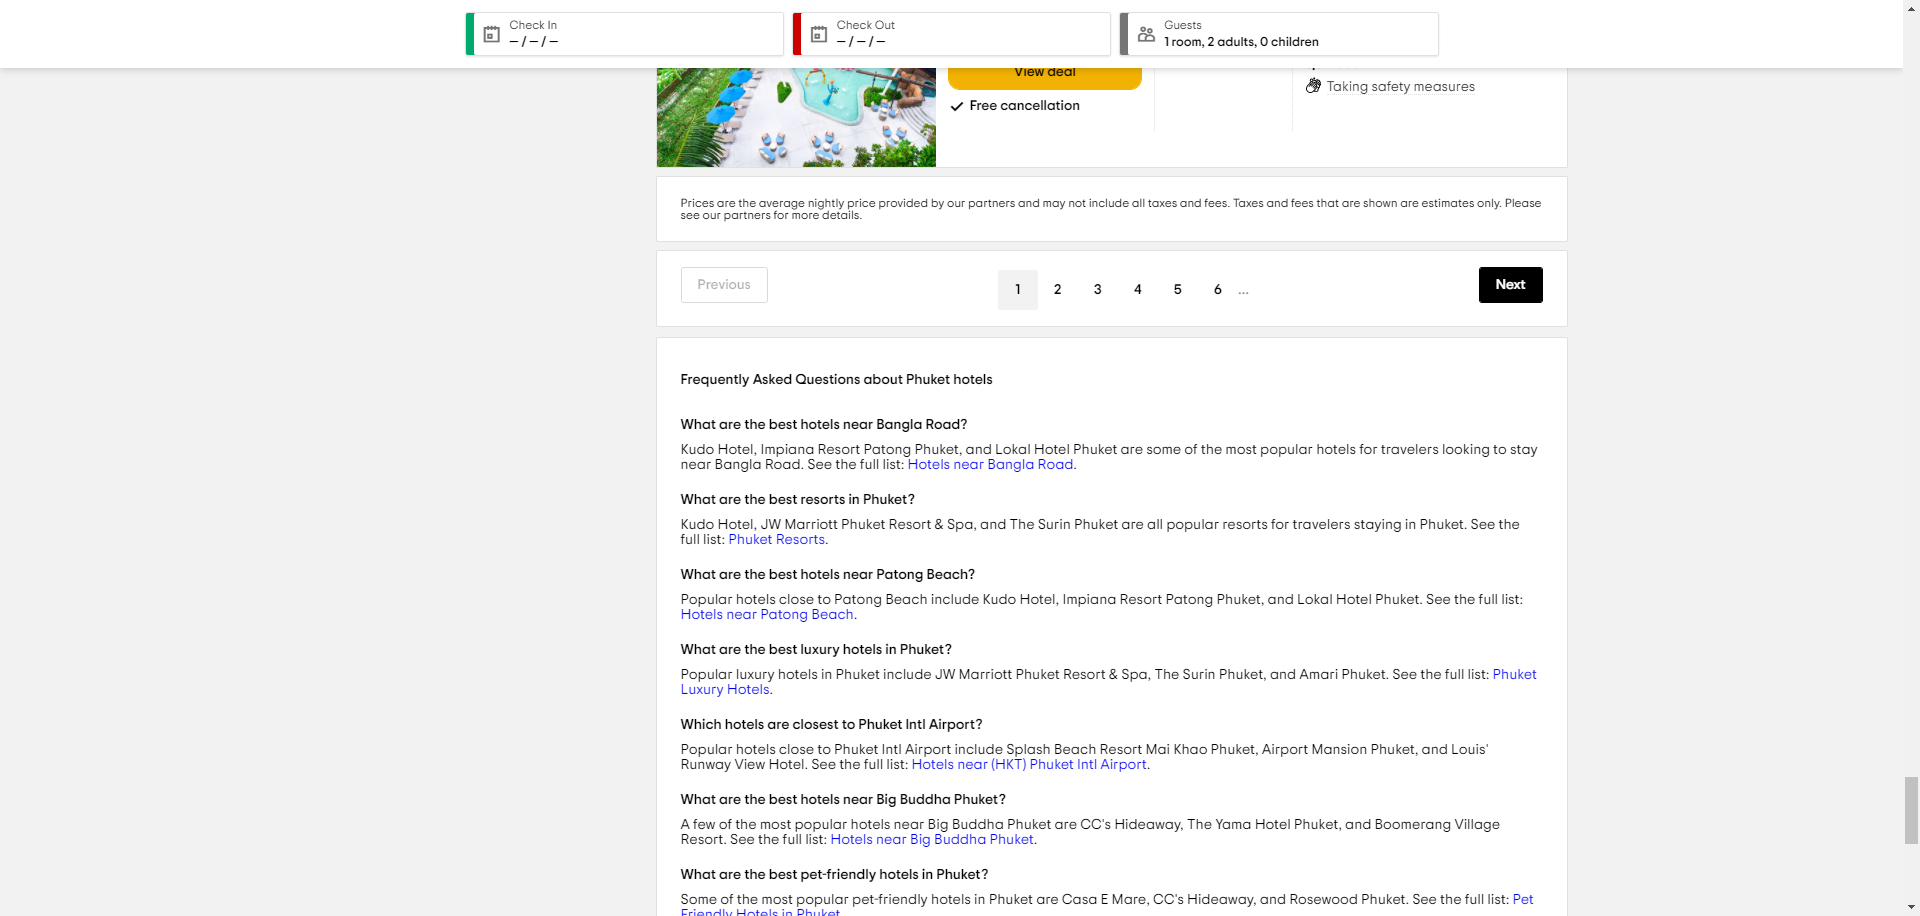

In [35]:
# เลื่อนหน้าจอ มาที่ตำแหน่งทีระบุ
driver.execute_script("window.scrollTo(0," + str(y-250) + ")")
driver.save_screenshot("screenshot.png")
Image('screenshot.png')

In [36]:
# หน้าทั้งหมด
total_page = driver.find_element(By.XPATH,'//*[@data-trackingstring="pagination_h"]').get_attribute('data-numpages')
total_page

'145'

In [37]:
bt_next = driver.find_elements(By.XPATH,'//*[@class="nav next ui_button primary"]')
if len(bt_next) > 0:
  next_page = bt_next[0].get_attribute('data-page-number')
  print(next_page)

2


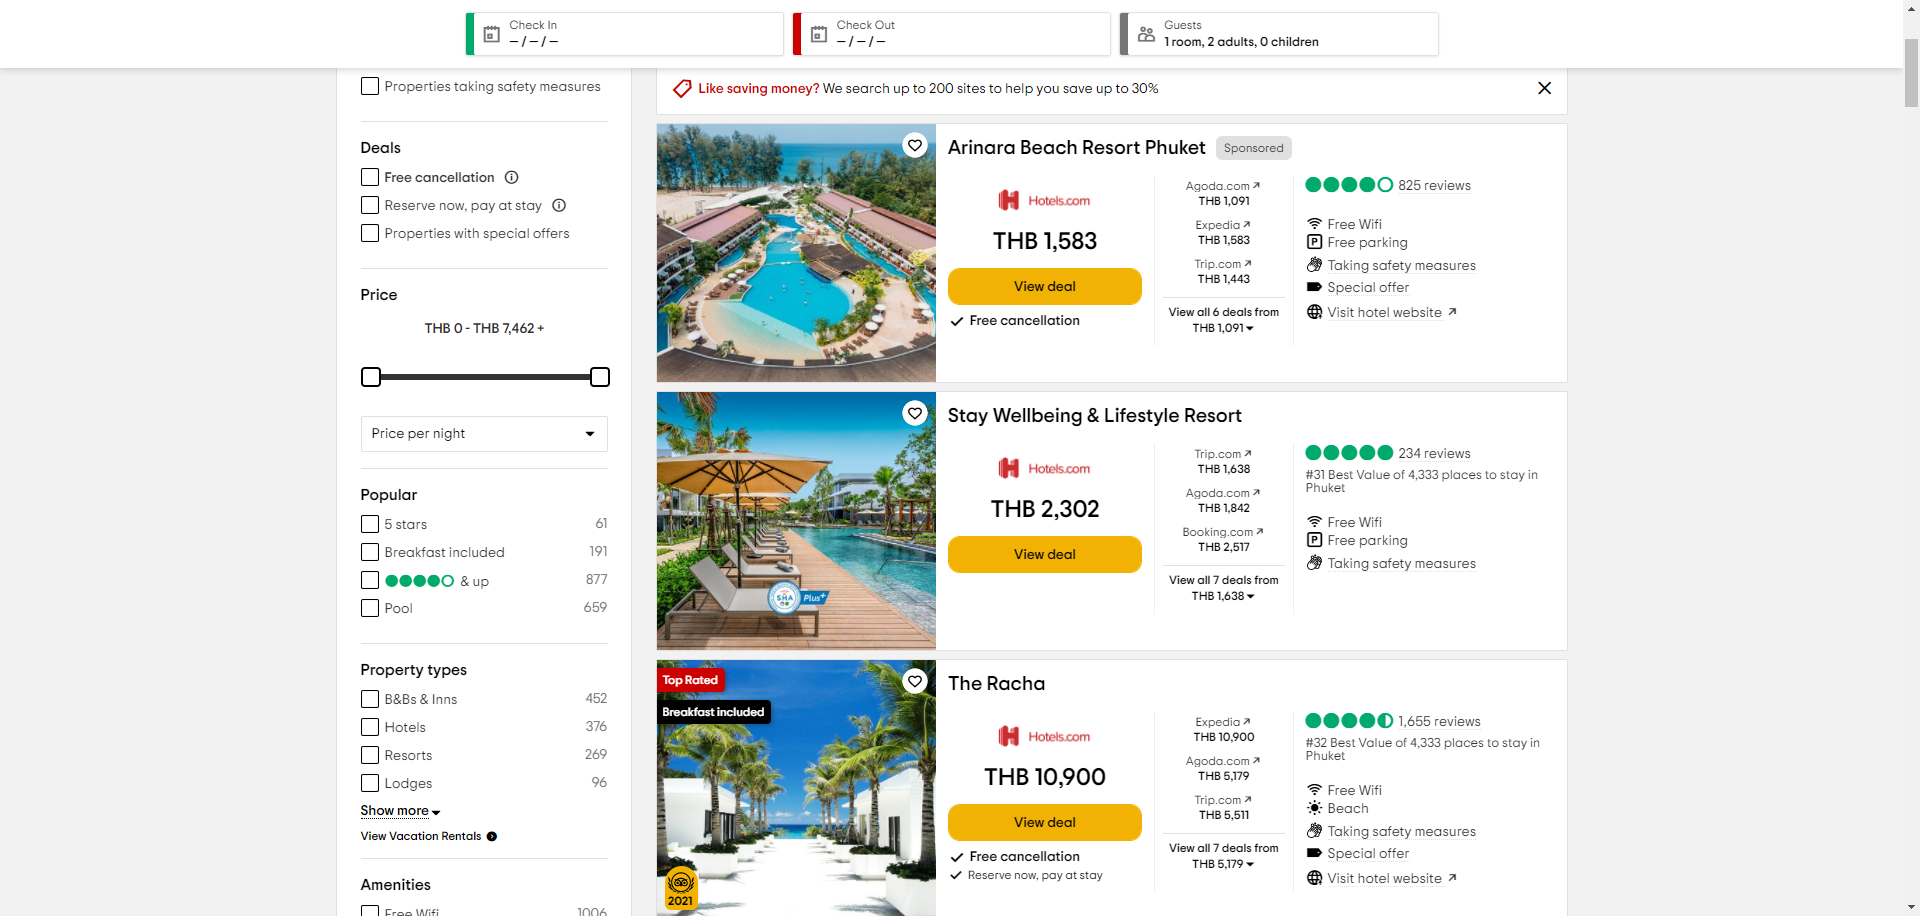

In [38]:
bt_next[0].click()
time.sleep(10)
driver.save_screenshot("screenshot.png")
Image('screenshot.png')

In [39]:
# เช็คการโหลดข้อมูล
loading_element = driver.find_element(By.CLASS_NAME,"loadingBox").is_displayed()
loading_element

False

In [40]:
driver.find_element(By.ID,'taplc_main_pagination_bar_hotels_less_links_v2_0')
  # .screenshot("screenshot.png")
  # Image('screenshot.png')

<selenium.webdriver.remote.webelement.WebElement (session="d45779cdd23fde6042c78846caf035dd", element="49b3e2ce-bd26-482f-a1a5-2472ae1fa7a8")>

In [41]:
hotel_list = []

In [42]:
for i in range(10):
# for i in range(int(total_page)):
  try : 
    hotel_list = hotel_list + get_hotel_list(driver)
  except Exception as e:
    print("\r",e,end="") 
  y = driver.find_element(By.ID,'taplc_main_pagination_bar_hotels_less_links_v2_0').location['y']
  driver.execute_script("window.scrollTo(0," + str(y-250) + ")")
  # driver.find_element(By.ID,'taplc_main_pagination_bar_hotels_less_links_v2_0').screenshot("screenshot.png")
  # display(Image('screenshot.png'))
  bt_next = driver.find_elements(By.XPATH,'//*[@class="nav next ui_button primary"]')
  if len(bt_next) > 0:
    try:
      next_page = driver.find_element(By.XPATH,'//*[@class="nav next ui_button primary"]')
      print("\r",next_page.get_attribute('data-page-number'),end="")
      next_page.click()
    except Exception as error:
      # print(error)
      pass
  else:
    break
  count = 0
  while count < 2000:
    loading_element = driver.find_element(By.CLASS_NAME,"loadingBox").is_displayed()
    if not loading_element:
      break
hotel_list = hotel_list + get_hotel_list(driver)

 11

In [43]:
len(hotel_list)

571

In [44]:
pd.DataFrame(hotel_list).drop_duplicates().reset_index(drop=True)

hotel_name           hotel_id  \
0        Arinara Beach Resort Phuket   property_3879035   
1    JW Marriott Phuket Resort & Spa    property_519702   
2        Grand Mercure Phuket Patong   property_6390760   
3                       Amari Phuket    property_305178   
4      Katathani Phuket Beach Resort    property_540134   
..                               ...                ...   
329                           Meroom   property_7092766   
330                 Himmapana Villas  property_15348824   
331                    Two Chefs Inn   property_2572095   
332          Baba House Phuket Hotel   property_9759087   
333                     Jinda Resort   property_7730167   

                                            hotel_href     review_rating  \
0    https://www.tripadvisor.com/Hotel_Review-g1224...    4 of 5 bubbles   
1    https://www.tripadvisor.com/Hotel_Review-g1223...  4.5 of 5 bubbles   
2    https://www.tripadvisor.com/Hotel_Review-g2979...  4.5 of 5 bubbles   
3    https://www.tripadvisor.com/Hotel_Review-g2979...  4.5 of 5 bubbles   
4    https://www.tripadvisor.com/Hotel_Review-g7847...  4.5 of 5 bubbles   
..                                                 ...               ...   
329  https://www.tripadvisor.com/Hotel_Review-g2315...  4.5 of 5 bubbles   
330  https://www.tripadvisor.com/Hotel_Review-g1379...    5 of 5 bubbles   
331  https://www.tripadvisor.com/Hotel_Review-g1210...  4.5 of 5 bubbles   
332  https://www.tripadvisor.com/Hotel_Review-g2315...  4.5 of 5 bubbles   
333  https://www.tripadvisor.com/Hotel_Review-g1215...  4.5 of 5 bubbles   

      review_count Choice2021Winner  
0      825 reviews              NaN  
1    6,061 reviews              NaN  
2    2,706 reviews              NaN  
3    9,390 reviews              NaN  
4    5,401 reviews              NaN  
..             ...              ...  
329    148 reviews              NaN  
330     37 reviews              NaN  
331     97 reviews              NaN  
332     62 reviews              NaN  
333     91 reviews              NaN  

[334 rows x 6 columns]

In [45]:
temp =  pd.DataFrame(hotel_list).drop_duplicates().reset_index(drop=True)
temp['rating'] = temp['review_rating'].apply(lambda x : float( x.split(' ')[0]))
temp['review_count_value'] = temp['review_count'].apply(lambda x : 0 if x != x else int(x.replace(' reviews','').replace(',','')))
temp.describe()

rating  review_count_value
count  334.000000          334.000000
mean     4.314371          981.026946
std      0.381600         1294.806603
min      3.500000            7.000000
25%      4.000000          151.750000
50%      4.500000          488.500000
75%      4.500000         1333.750000
max      5.000000         9391.000000

In [46]:
temp.groupby(by=['rating'])[['hotel_name']].count()

hotel_name
rating            
3.5             24
4.0            110
4.5            166
5.0             34

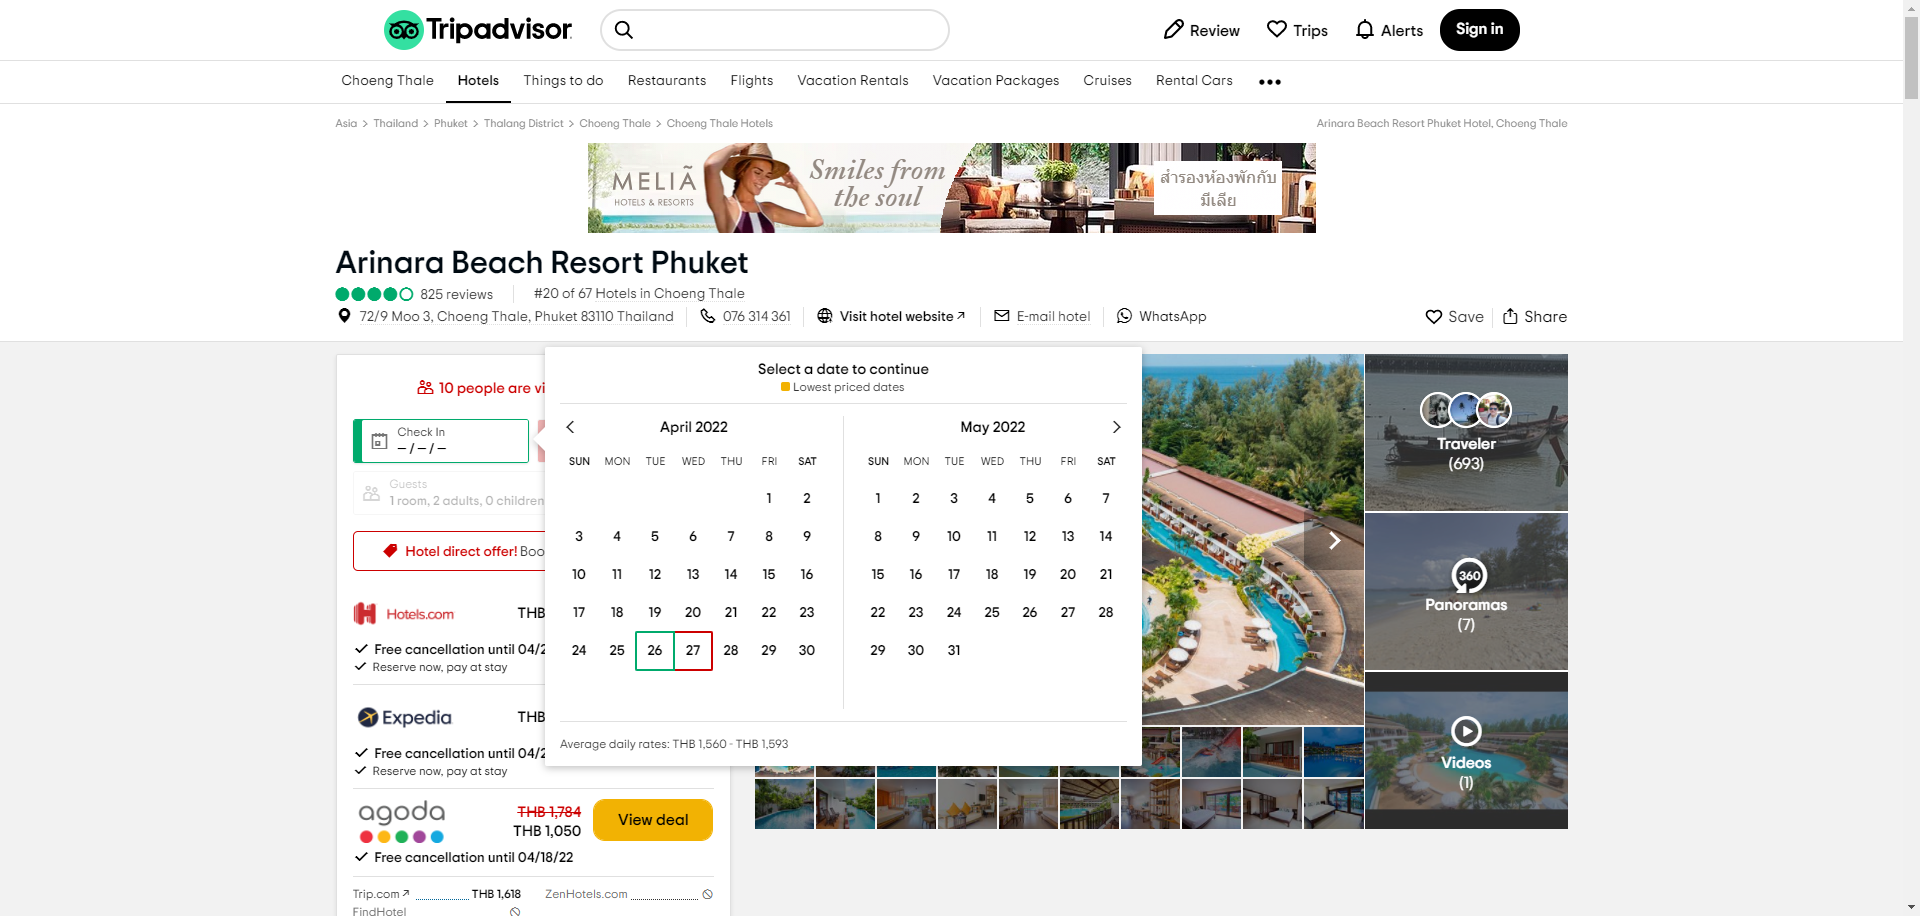

In [47]:
url ='https://www.tripadvisor.com/Hotel_Review-g1224250-d3879035-Reviews-Arinara_Beach_Resort_Phuket-Choeng_Thale_Thalang_District_Phuket.html'
driver.get(url)
time.sleep(10)
driver.save_screenshot("screenshot.png")
Image('screenshot.png')

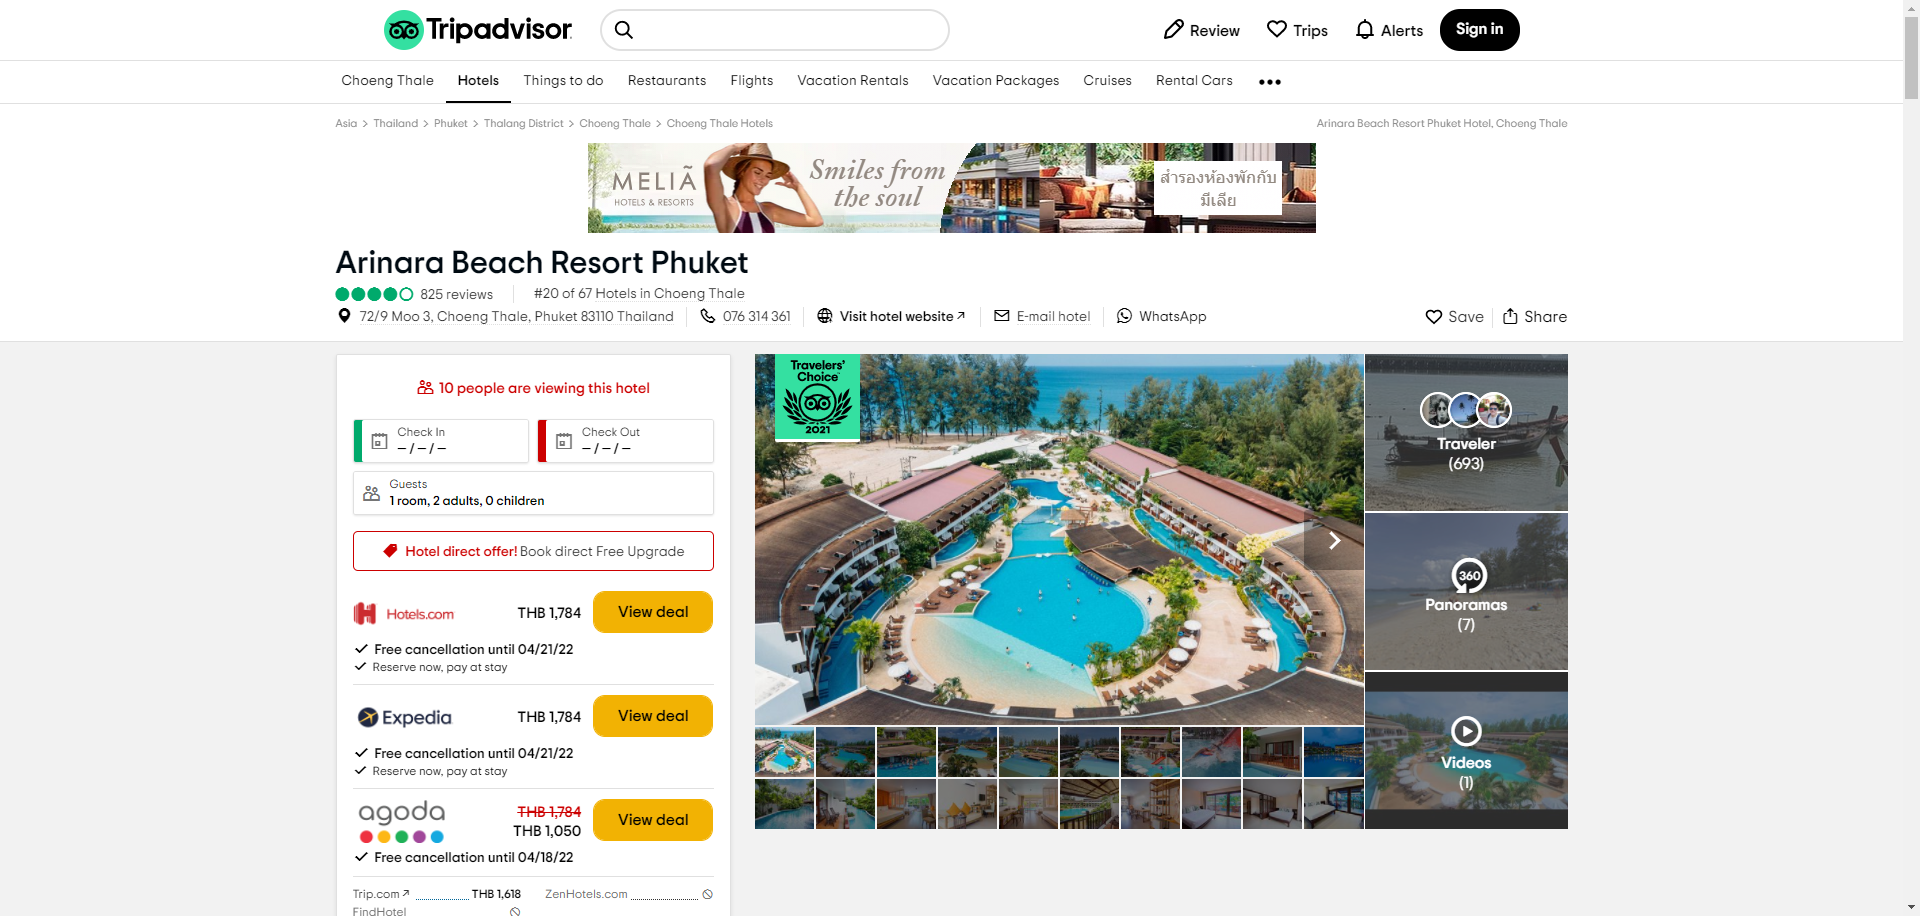

In [48]:
driver.switch_to.active_element.send_keys(Keys.ESCAPE)
driver.save_screenshot("screenshot.png")
Image('screenshot.png')

In [49]:
hotel_info ={}

In [50]:
name_temp = driver.find_elements(By.XPATH,'//*[@id="HEADING"]')
if len(name_temp) > 0:
  hotel_info['name'] = name_temp[0].text
hotel_info

{'name': 'Arinara Beach Resort Phuket'}

In [51]:
rating_temp = driver.find_elements(By.CLASS_NAME,'ui_bubble_rating')
len(rating_temp)

21

In [52]:
[item.text for item in rating_temp]

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [53]:
rating_temp = driver.find_elements(By.XPATH,'//*[@href="#REVIEWS"]')
len(rating_temp)

2

In [54]:
[item.text for item in rating_temp]

['825 reviews', 'Very good\n825 reviews']

In [55]:
rating_temp = driver.find_elements(By.XPATH,'//*[@href="#REVIEWS"]')
if len(rating_temp) > 0:
  hotel_info['rating'] = rating_temp[0].find_element(By.CLASS_NAME,'ui_bubble_rating').get_attribute('class').replace('ui_bubble_rating bubble_','')
  hotel_info['review_count'] = rating_temp[0].find_element(By.CLASS_NAME,'HFUqL').text.replace(' reviews','')
hotel_info

{'name': 'Arinara Beach Resort Phuket', 'rating': '40', 'review_count': '825'}

In [56]:
highlight_temp = driver.find_elements(By.CLASS_NAME,'KeVaw')
if len(highlight_temp) > 0:
  hotel_info['review_count'] = highlight_temp[0].text
hotel_info

{'name': 'Arinara Beach Resort Phuket',
 'rating': '40',
 'review_count': '#20 of 67 Hotels in Choeng Thale'}

In [57]:
location_temp = driver.find_elements(By.XPATH,'//*[@class="epMGr cLZgU"]')
if len(location_temp)>0 :
  hotel_info['address'] =location_temp[0].text
hotel_info  

{'name': 'Arinara Beach Resort Phuket',
 'rating': '40',
 'review_count': '#20 of 67 Hotels in Choeng Thale',
 'address': '72/9 Moo 3, Choeng Thale, Phuket 83110 Thailand'}

In [58]:
phone_temp = driver.find_elements(By.XPATH,'//*[@data-blcontact="PHONE "]')
if len(phone_temp)>0:
  hotel_info['phone'] =phone_temp[0].find_element(By.XPATH,'.//*[@class="eeFQx ceIOZ yYjkv"]').text[4:]
hotel_info  

{'name': 'Arinara Beach Resort Phuket',
 'rating': '40',
 'review_count': '#20 of 67 Hotels in Choeng Thale',
 'address': '72/9 Moo 3, Choeng Thale, Phuket 83110 Thailand',
 'phone': '314 361'}

In [59]:
award_badge_temp = driver.find_elements(By.XPATH,'//*[@data-test-target="tc-award-badge"]')
if len(award_badge_temp)>0:
  hotel_info['award_badge'] = [item.get_attribute('alt') for item in award_badge_temp[0].find_elements(By.XPATH,'.//*')]
hotel_info

{'name': 'Arinara Beach Resort Phuket',
 'rating': '40',
 'review_count': '#20 of 67 Hotels in Choeng Thale',
 'address': '72/9 Moo 3, Choeng Thale, Phuket 83110 Thailand',
 'phone': '314 361',
 'award_badge': ["Travelers' Choice 2021 Winner"]}

In [60]:
[item.get_attribute('data-ssrev-handlers') for item in driver.find_elements(By.CLASS_NAME,'ssr-init-26f')]

['{"load":[3,"TJ00-e","Awards",{"locationId":3879035,"loading":false,"viewport":"DESKTOP","coeAward":3879035,"greenLeader":null,"travelersChoice":null,"isOptimusProperty":false}]}',
 '{"load":[3,"TJ00-e","Description",{"loading":false,"locationDescription":"Let Yourself Be Enchanted Arinara Beach Resort Phuket creates the time and space for you to retreat and relaxing with the care of our attentive hospitality. Our resort designed in harmony environment seamlessly blends seaside architecture with the privacy comforts accommodations, Arinara offers an oasis swimming pool and just steps to the sands of the resort’s beachfront. Whether seeking the perfect retreat or a memorable family holiday, surrender to the enchantment of Arinara Beach Resort Phuket.","viewport":"DESKTOP"}]}',
 '{"load":[3,"TJ00-e","Photos",{"locationId":3879035,"loading":false,"heroPhotoId":569524070,"photos":[{"photo":{"id":449273031,"type":"p","photoSizes":[{"height":0,"url":"https://dynamic-media-cdn.tripadvisor.co

In [61]:
data_ssrev_handlers_temp = driver.find_elements(By.CLASS_NAME,'ssr-init-26f')
if len(data_ssrev_handlers_temp)>0:
  hotel_info['ssrev_handlers'] =[{"type":json.loads(item.get_attribute('data-ssrev-handlers'))['load'][2],
    "value":json.loads(item.get_attribute('data-ssrev-handlers'))['load'][3]} for item in driver.find_elements(By.CLASS_NAME,'ssr-init-26f')]
hotel_info

{'name': 'Arinara Beach Resort Phuket',
 'rating': '40',
 'review_count': '#20 of 67 Hotels in Choeng Thale',
 'address': '72/9 Moo 3, Choeng Thale, Phuket 83110 Thailand',
 'phone': '314 361',
 'award_badge': ["Travelers' Choice 2021 Winner"],
 'ssrev_handlers': [{'type': 'Awards',
   'value': {'locationId': 3879035,
    'loading': False,
    'viewport': 'DESKTOP',
    'coeAward': 3879035,
    'greenLeader': None,
    'travelersChoice': None,
    'isOptimusProperty': False}},
  {'type': 'Description',
   'value': {'loading': False,
    'locationDescription': 'Let Yourself Be Enchanted Arinara Beach Resort Phuket creates the time and space for you to retreat and relaxing with the care of our attentive hospitality. Our resort designed in harmony environment seamlessly blends seaside architecture with the privacy comforts accommodations, Arinara offers an oasis swimming pool and just steps to the sands of the resort’s beachfront. Whether seeking the perfect retreat or a memorable family 

In [62]:
map_temp = driver.find_elements(By.XPATH,'//*[@data-test-target="staticMapSnapshot"]')
if len(map_temp)>0:
  hotel_info['location'] = map_temp[0].find_element(By.XPATH,'.//img').get_attribute('src').split("center=")[1].split("&")[0]
hotel_info

{'name': 'Arinara Beach Resort Phuket',
 'rating': '40',
 'review_count': '#20 of 67 Hotels in Choeng Thale',
 'address': '72/9 Moo 3, Choeng Thale, Phuket 83110 Thailand',
 'phone': '314 361',
 'award_badge': ["Travelers' Choice 2021 Winner"],
 'ssrev_handlers': [{'type': 'Awards',
   'value': {'locationId': 3879035,
    'loading': False,
    'viewport': 'DESKTOP',
    'coeAward': 3879035,
    'greenLeader': None,
    'travelersChoice': None,
    'isOptimusProperty': False}},
  {'type': 'Description',
   'value': {'loading': False,
    'locationDescription': 'Let Yourself Be Enchanted Arinara Beach Resort Phuket creates the time and space for you to retreat and relaxing with the care of our attentive hospitality. Our resort designed in harmony environment seamlessly blends seaside architecture with the privacy comforts accommodations, Arinara offers an oasis swimming pool and just steps to the sands of the resort’s beachfront. Whether seeking the perfect retreat or a memorable family 

In [63]:
driver.close()